Welcome to the Python Plotting Tutorial for Com597I!
=============================

This is intended as a self-guided exercise to help you explore python plotting. Please follow the document, follow the links and read the documentation. I'll be circulating to help you if you have questions.


In [1]:
# This section imports some important libraries that we'll need.
# the most important is the second line. After you run this, "plt" will be
# the plotting library in python.

import numpy
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


A super simple chart
-----------------------

The simplest possible plot is a line chart. See the example below. Answer the following questions:
* What variable holds the data?
* We only defined one data series. Is it on the y or x axis?
* What do the functions `ylabel`, `xlabel`, and `title` do? Remove them to test your idea.

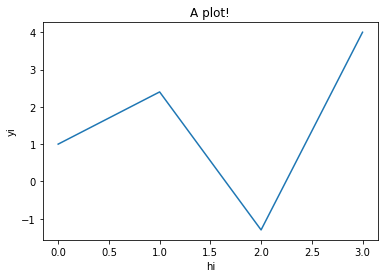

In [4]:
my_data = [1,2.4,-1.3,4]

plt.plot(my_data)
plt.ylabel("yi")
plt.xlabel("hi")
plt.title("A plot!")
plt.show()

** Try This**

Using the documentation for `matplotlib.pyplot` found [here](http://matplotlib.org/users/pyplot_tutorial.html) make a plot for the following data set. In this case, you want to plot both x and y values.

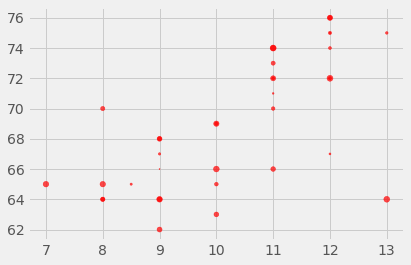

In [33]:
height = [68, 66, 75, 71, 67, 65, 67, 75, 72, 74, 72, 75, 69, 70, 65, 64, 68, 73, 70, 76, 64, 64, 66, 63, 68, 62, 72, 74, 76, 69, 65, 65, 64, 66, 64, 72, 74]
shoe_size = [12 ,9 ,12 ,11 ,12 ,8.5 ,9 ,13 ,11 ,12 ,12 ,12 ,10 ,11 ,10 ,8 ,9 ,11 ,8 ,12 ,8 ,9 ,11 ,10 ,9 ,9 ,11 ,11 ,12 ,10 ,8 ,7 ,9 ,10 ,13 ,12 ,11]

# put your code here
plt.scatter(shoe_size, height, s=range(len(height)), color="red", marker="o", linestyle="None", alpha=.7)
plt.show()


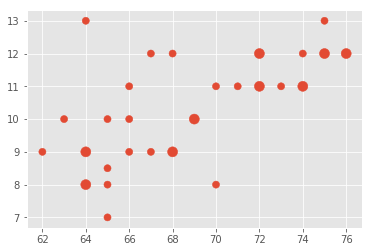

In [29]:
# want:
hist = {}
for i in range(len(height)):
    combo = str(height[i]) + "," + str(shoe_size[i])
    if combo not in hist:
        hist[combo] = 0
    hist[combo] = hist[combo] + 1

new_height = []
new_shoe_size = []
counts = []

for key in hist:
    key_split = key.split(",")
    new_height.append(int(key_split[0]))
    new_shoe_size.append(float(key_split[1]))
    counts.append(hist[key] * 50)
    
plt.scatter(new_height, new_shoe_size, counts)
plt.show()

*Improving the plot*

When I made the plot above, it was a very jumbled line chart, which didn't look very good. Using the [tutorial](http://matplotlib.org/users/pyplot_tutorial.html) figure out how to plot the points as dots rather than as a line chart.

In [26]:
# put your new plot here

If you look carefully at the data, you'll find cases where the same exact point shows up twice or more. One trick is to use *alpha* or the transparency of a dot to handle overlapping data. Using the argument `alpha=0.3` in the plot above to make each particular dot slightly transparent.



In [29]:
# put your code here. Make sure you include axis labels and a title!

**Challenge**

Last week, we processed the congressional district data to produce a data set with the percent of the working population in each industry compared to the mean and median salary in that district. You opened that data in Excel to produce a plot.

Recreate a plot of percent of the district in engineering and the mean salary for that district. Make sure to label your axes.

(Hint) remember: all of the python you have learned will work in the notebook. You can still use `open` for instance.


total,constr,manuf,finance,constr_r,manuf_r,finance_r,mean_income,median_income



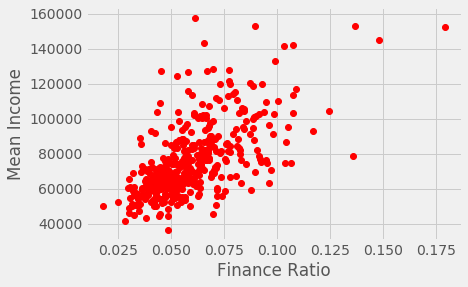

In [32]:
# put your code here.
input_file = open("cd1141dp3_clean.csv")
header = input_file.readline()
print(header)

finance_ratios = []
mean_incomes = []

for line in input_file:
    split_line = line.split(',')
    finance_ratio = float(split_line[6])
    mean_income = float(split_line[7])
    finance_ratios.append(finance_ratio)
    mean_incomes.append(mean_income)

plt.plot(finance_ratios, mean_incomes, 'ro')
plt.xlabel("Finance Ratio")
plt.ylabel("Mean Income")

Bar charts
----------

The line charts above are great for cardinal data, but python can do many other kinds of plots. Here, we'll make a bar chart. There are a few differences:

* First of all, we still need an x and a y variable. I made a fake set of data for the x axis using `range` and `len`. What are the values in fake_x_data?
* Play with the width variable to see what it does to the plot.
* Note that we use `xticks` to label our groupings.

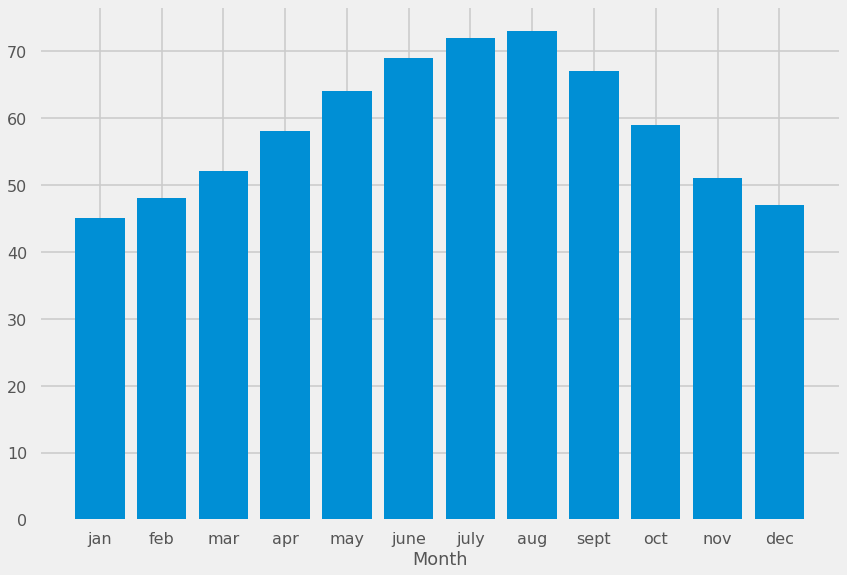

In [35]:
month = ["jan", "feb", "mar", 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
high = [45, 48, 52, 58, 64, 69, 72, 73, 67, 59, 51, 47]
low = [36, 37, 39, 43, 47, 52, 54, 55, 52, 47, 41, 38]
fake_x_data = range(len(month))
width = .8
plt.bar(fake_x_data, high, width)
plt.xticks(fake_x_data, month)
plt.xlabel("Month")
plt.show()

**Try it**

Add another bar to the same chart for the monthly low temperature. Make sure you label your axes!

Styles
-------

Now that we've created some simple charts in python, let's see how to make them beautiful!

Matplotlib comes with many pre-built style packages that can be used to make your plots automatically look professional. Try the samples below for a taste. 

The full set can be found by running the command below:

In [23]:
list(plt.style.available)

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

Use a style like this:

In [34]:
plt.style.use("seaborn-poster")

**Try it!**

Set a context like above and rerun any of the plots in your document.

Histograms
----------

Pyplot includes excellent support for histograms. A histogram uses the *range* of your data on the x-axis. It divides that range in to buckets (usually with equal widths) and counts the number of values that fall into each bucket. Look at the example below:

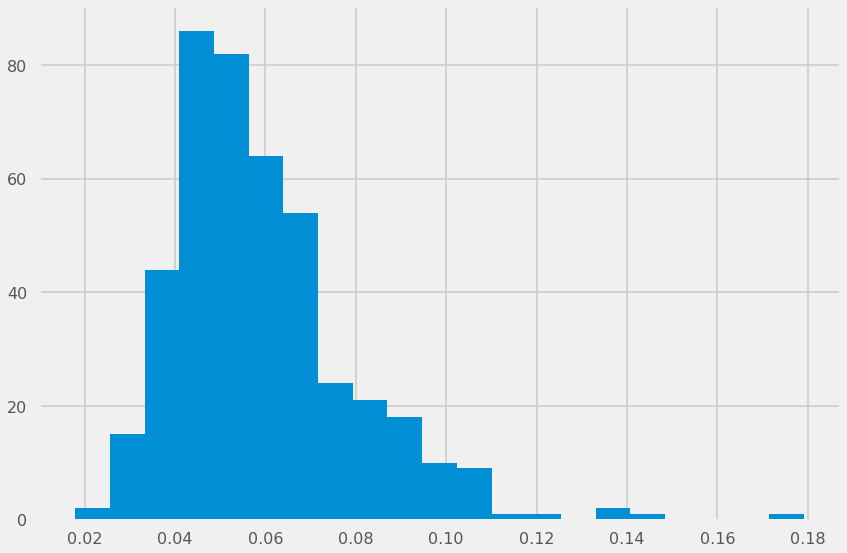

In [43]:
fake_data = [1, 1, 1, 1, 2, 2, 3, 4, 5, 1, 2, 3, 4, 6, 7]
plt.hist(finance_ratios, bins=21)
plt.show()

**Do it!**

Read in the mean salary per congressional district and construct a histogram from that data.
* Investigate the `bins` argument. What happens if you set this too high? What if you set it too low? Generally, `sqrt(n)` is a good size for n data points.

**Challenge**

Get the salary data from [here](https://github.com/guyrt/teaching/tree/master/2017/Com597I/summary) (it's the tsv file).  Import this file into python and build a histogram of salary.

* How many bins are a good fit?
* There are clearly outliers in this data. Investigate the `range` argument to `hist` to help truncate the plot.
* What does the normalize argument do?

Hint: [here is the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)

Getting help
--------------

The plotting libraries in python are incredibly rich, and we have barely scratched the surface. 

The best way to figure out what is possible is to look at the [gallery](http://matplotlib.org/gallery.html) in Matplotlib's documentation. Every plot in the gallery has sample python code that produces exactly that plot. Usually, when I'm trying to make a plot, I start with a gallery example and modify it to suite my needs.

The key thing to do when you use these examples is to figure out how to structure the data. If you can map your data format to the format in the example, then you can usually just use the examples directly.
